In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import matplotlib.pylab as plt
import os
import shutil
import cv2
from sklearn import tree
from sklearn.metrics import confusion_matrix


In [2]:
# Paths for the dataset
train_path = "c:/Users/LENOVO/Downloads/Smart Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validation_path = "c:/Users/LENOVO/Downloads/Smart Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
output_train_path = "/kaggle/working/reduced_dataset/train"
output_validation_path = "/kaggle/working/reduced_dataset/valid"

# # Number of images per class
train_samples = 1000
validation_samples = 300

# # Function to sample and copy images
def create_subset(input_path, output_path, samples_per_class):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    for class_name in os.listdir(input_path):
        class_dir = os.path.join(input_path, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            
            selected_images = images[:samples_per_class]
            class_output_dir = os.path.join(output_path, class_name)
            os.makedirs(class_output_dir, exist_ok=True)
            for image in selected_images:
                src = os.path.join(class_dir, image)
                dst = os.path.join(class_output_dir, image)
                shutil.copy(src, dst)
            print(f"Processed class '{class_name}' with {samples_per_class} images.")


# Create subsets for training and validation
create_subset(train_path, output_train_path, train_samples)
create_subset(validation_path, output_validation_path, validation_samples)
create_subset("c:/Users/LENOVO/Downloads/Smart Data/test/test","/kaggle/working/reduced_dataset/test",33)
print("Subset creation completed.")

Processed class 'Apple___Apple_scab' with 1000 images.
Processed class 'Apple___Black_rot' with 1000 images.
Processed class 'Apple___Cedar_apple_rust' with 1000 images.
Processed class 'Apple___healthy' with 1000 images.
Processed class 'Blueberry___healthy' with 1000 images.
Processed class 'Cherry_(including_sour)___healthy' with 1000 images.
Processed class 'Cherry_(including_sour)___Powdery_mildew' with 1000 images.
Processed class 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot' with 1000 images.
Processed class 'Corn_(maize)___Common_rust_' with 1000 images.
Processed class 'Corn_(maize)___healthy' with 1000 images.
Processed class 'Corn_(maize)___Northern_Leaf_Blight' with 1000 images.
Processed class 'Grape___Black_rot' with 1000 images.
Processed class 'Grape___Esca_(Black_Measles)' with 1000 images.
Processed class 'Grape___healthy' with 1000 images.
Processed class 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' with 1000 images.
Processed class 'Orange___Haunglongbing_(Ci

In [3]:
training_data = os.listdir("c:/Users/LENOVO/Downloads/Smart Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
test_data=glob('/kaggle/input/new-plant-diseases-dataset/test/test/*.JPG')
validation_data=os.listdir("c:/Users/LENOVO/Downloads/Smart Data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

In [4]:
def extract_features(image_path):
    
    image = cv2.imread(image_path)
  
    image = cv2.resize(image, (128, 128))
    
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    lbp = cv2.Laplacian(gray, cv2.CV_64F).var()  
    
    features = np.hstack([hist, lbp])
    return features


In [5]:
training_images_path=dict()
for class_path in training_data:
    
    images_path=[]
    
    for class_image in os.listdir("/kaggle/working/reduced_dataset/train/"+class_path):
        images_path.append("/kaggle/working/reduced_dataset/train/"+class_path+"/"+class_image)
        
    training_images_path.update({class_path:images_path})
        


In [6]:
validation_images_path=dict()
for class_path in validation_data:
    images_path=[]
    
    for class_image in os.listdir("/kaggle/working/reduced_dataset/valid/"+class_path):
        images_path.append("/kaggle/working/reduced_dataset/valid/"+class_path+"/"+class_image)
    
    validation_images_path.update({class_path:images_path})


In [7]:
prepared_training_data=dict()
for class_element in training_images_path:
    features=[]
    for image_path in training_images_path.get(class_element):
        features.append(extract_features(image_path))
    prepared_training_data.update({class_element:features})

In [8]:
prepared_validation_data=dict()
for class_element in validation_images_path:
    features=[]
    for image_path in validation_images_path.get(class_element):
        
        features.append(extract_features(image_path))
    prepared_validation_data.update({class_element:features})

In [9]:
x=[]
y=[]
i=0
for class_name, feature_list in prepared_training_data.items():
    for features in feature_list:
        x.append(features)  # Add the feature vector
        y.append(i)
    i=i+1


In [10]:
clf=tree.DecisionTreeRegressor()

clf.fit(x,y)

DecisionTreeRegressor()

In [11]:
x_test=[]
y_test=[]
i=0
for class_name, feature_list in prepared_validation_data.items():
    for features in feature_list:
        x_test.append(features)  # Add the feature vector
        y_test.append(i)
    i=i+1
y_pred=clf.predict(x_test)

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       471
           1       0.86      0.81      0.83       472
           2       0.87      0.89      0.88       432
           3       0.85      0.87      0.86       473
           4       0.82      0.75      0.79       436
           5       0.88      0.94      0.91       442
           6       0.85      0.90      0.87       412
           7       0.81      0.74      0.77       406
           8       0.95      0.98      0.96       451
           9       0.98      0.97      0.98       455
          10       0.85      0.89      0.87       458
          11       0.75      0.85      0.80       460
          12       0.92      0.89      0.91       457
          13       0.82      0.84      0.83       413
          14       0.88      0.89      0.88       417
          15       0.78      0.77      0.77       473
          16       0.75      0.65      0.70       444
          17       0.90    

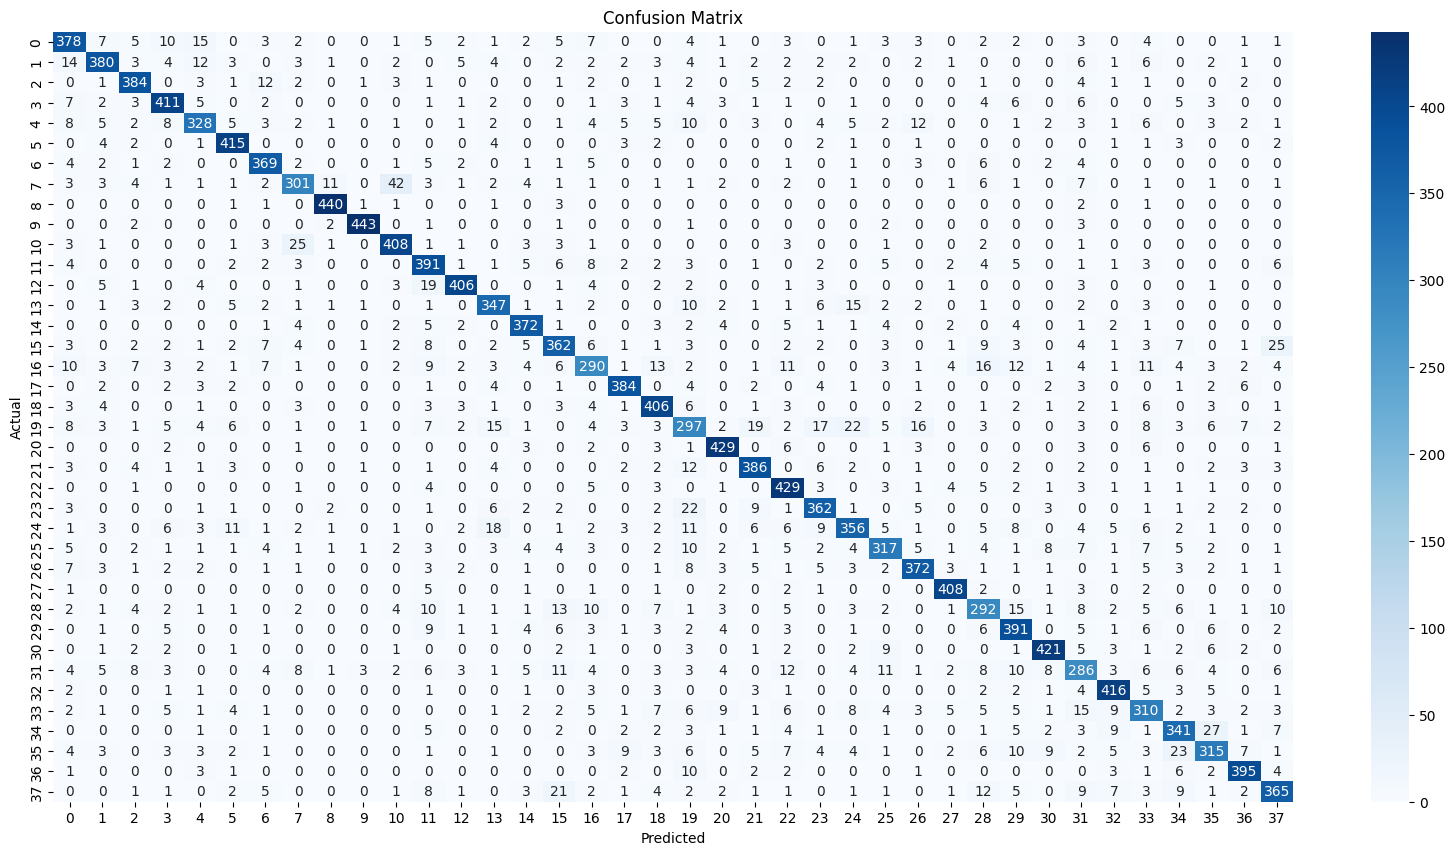

In [15]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Or fit(y) depending on your original dataset

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()